# Machine Learning - Final Project

<u>Group 15</u> <br>
Herut Ben Salmon - 208055277 <br>
Liad Hechler - 318382157 

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler,OrdinalEncoder
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import warnings
warnings.filterwarnings('ignore')

#### Import Data

In [2]:
feature_data = pd.read_csv("feature_data.csv")
print(feature_data.shape)
label_data = pd.read_csv("label_data.csv")
print(label_data.shape)
test = pd.read_csv("feature_data_test.csv")
print(test.shape)

(89542, 34)
(89542, 2)
(29848, 34)


# Exploring the Data

### In the Exploration part, we will present the data visually to understand the features' behavior.

First, overview on the data

In [3]:
feature_data.describe(include='all')

,Unnamed: 0,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
count,89542.000000,76861.000000,89542.000000,86108,89542,89542.000000,89542.000000,89538.000000,89542.000000,85201,...,89542.000000,85510.000000,85309.000000,85294.000000,89542.000000,85811.000000,86810.000000,84585.000000,89542,5776.000000
unique,NaN,NaN,NaN,12,53,NaN,NaN,NaN,NaN,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,August,week_33,NaN,NaN,NaN,NaN,PRT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,NaN,NaN,10080,2703,NaN,NaN,NaN,NaN,34804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44883,NaN
mean,59716.762871,103.673879,2016.157658,NaN,NaN,15.828807,1.857497,0.103732,0.007896,NaN,...,0.989971,1.330944,2.339401,0.062607,0.571922,0.335691,0.427146,8.845679,NaN,0.365132
std,34495.242240,106.940156,0.707461,NaN,NaN,8.779753,0.565296,0.397797,0.095194,NaN,...,1.698086,1.879927,17.516854,0.243415,0.793567,0.472234,0.128140,5.236673,NaN,0.481509
min,0.000000,0.000000,2015.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161008,0.038632,NaN,0.000000
25%,29838.250000,18.000000,2016.000000,NaN,NaN,8.000000,2.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328012,4.452191,NaN,0.000000
50%,59743.500000,69.000000,2016.000000,NaN,NaN,16.000000,2.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425622,8.422255,NaN,0.000000
75%,89610.500000,159.000000,2017.000000,NaN,NaN,23.000000,2.000000,0.000000,0.000000,NaN,...,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.511077,12.712815,NaN,1.000000


### Graph 1 - Features with too many empty cells

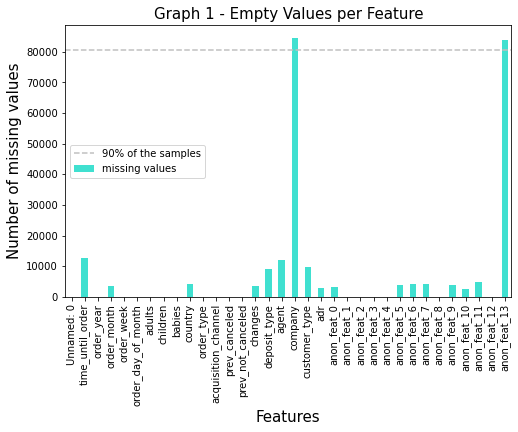

In [4]:
# Create a dataframe with the number of empty cells for each feature
empty_features = pd.DataFrame(data = (feature_data.isnull().sum(axis = 0)))
empty_features = empty_features.rename(columns = {0:'missing values'})

# Plot the data
empty_features.plot.bar(figsize=(8,5), color='turquoise')

# We used a threshold of 0.9, to show which features have more than 50% empty cells in its columns
plt.axhline(y = 0.9*feature_data.shape[0], color = 'silver', linestyle = '--',label='90% of the samples')

# Add labels and title
plt.xlabel('Features', size = 15)
plt.ylabel('Number of missing values', size = 15)
plt.title('Graph 1 - Empty Values per Feature',size = 15)
plt.legend()

### Sort the features by type - before preprocessing

In [5]:
# Find how many unique values each feature has
unique_values = feature_data.nunique().sort_values()
unique_values = pd.DataFrame(data = unique_values)
unique_values = unique_values.rename(columns = {0:'unique'})

# Boolean features have 2 unique values
bool_feat = unique_values[unique_values['unique'] == 2]
bool_feat_name = bool_feat.index.values

# The function nununique does not count blank cells, so we drop the features with blank cells from the boolean features list
for name in bool_feat_name:
    # Df with number of missing values for each boolean feature
    temp1 = empty_features.loc[[name],['missing values']]
    # Number of missing values
    temp2 = temp1.iloc[0]['missing values']
    if temp2 > 0:
        # Name of the feature
        name_to_delete = temp1.index.values[0]
        # Delete if needed
        bool_feat_name = np.delete(bool_feat_name,np.where(bool_feat_name == name_to_delete))

# Dataframe with the type of each feature
types = feature_data.dtypes

# Drop the boolean features, to sort the others to: numeric or categorial
types = types.drop(index = bool_feat_name)
types = pd.DataFrame(data = types)

categorial_feat = types[types[0] == object]
categorial_feat_name = categorial_feat.index.values

numeric_feat = types[(types[0] == 'int64') | (types[0] == 'float64')]
numeric_feat_name = numeric_feat.index.values

print('Types before preprocessing :\n')
print('Boolean Features: ',bool_feat_name, '\n')
print('Categorial Features: ',categorial_feat_name, '\n')
print('Numeric Features: ',numeric_feat_name, '\n')

Types before preprocessing :

Boolean Features:  ['anon_feat_12' 'anon_feat_3'] 

Categorial Features:  ['order_month' 'order_week' 'country' 'order_type' 'acquisition_channel'
 'deposit_type' 'customer_type'] 

Numeric Features:  ['Unnamed: 0' 'time_until_order' 'order_year' 'order_day_of_month'
 'adults' 'children' 'babies' 'prev_canceled' 'prev_not_canceled'
 'changes' 'agent' 'company' 'adr' 'anon_feat_0' 'anon_feat_1'
 'anon_feat_2' 'anon_feat_4' 'anon_feat_5' 'anon_feat_6' 'anon_feat_7'
 'anon_feat_8' 'anon_feat_9' 'anon_feat_10' 'anon_feat_11' 'anon_feat_13'] 



In [6]:
# Remove the features with too many empty cells from the list of numeric features
feat_to_drop = ['company','anon_feat_13']
for feat in feat_to_drop:
    numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == feat))

### Graph 2 - distribution of numeric features 

Graph 2 - distribution of numeric features



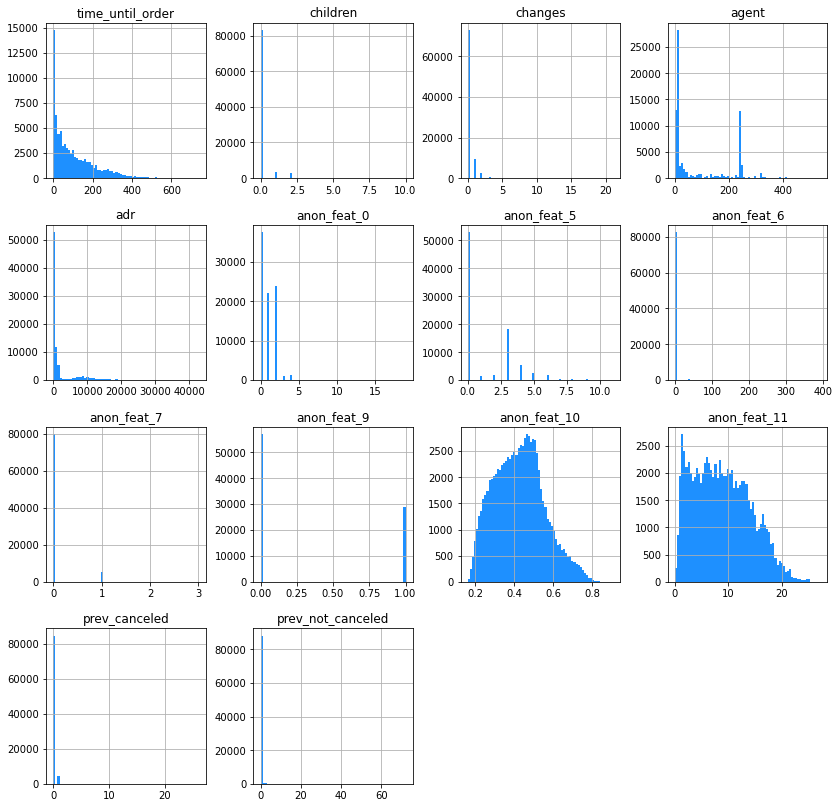

In [7]:
feat_dist = ['time_until_order','children','changes','agent','adr','anon_feat_0','anon_feat_5','anon_feat_6',
                'anon_feat_7','anon_feat_9','anon_feat_10', 'anon_feat_11','prev_canceled','prev_not_canceled']
print("Graph 2 - distribution of numeric features\n")
feature_data[feat_dist].hist(figsize = (14,14),color = 'dodgerblue',bins = 70)
plt.show()

In [8]:
# Choose how to fill the empty cells-
fill_feat_mean = ['anon_feat_0','anon_feat_5','anon_feat_10']
fill_feat_major = ['anon_feat_7','anon_feat_9','time_until_order','children','changes']

In [9]:
# Count the precent of samples with the value 0 in a feature
def zero_percentage(feature_data,feature):
    count_zero = feature_data[feature][feature_data[feature] == 0].count()
    print('{:.2f}% of the samples have the same value in {}'.format((100*count_zero/feature_data.shape[0]), feature))

zero_feat = ['anon_feat_6','prev_canceled','prev_not_canceled']
for feat in zero_feat:
    zero_percentage(feature_data,feat)

92.27% of the samples have the same value in anon_feat_6
94.57% of the samples have the same value in prev_canceled
96.97% of the samples have the same value in prev_not_canceled


In [10]:
for feat in zero_feat:
    # Add the features above to feat_to_drop, because they have more than 90% samples with the same value
    feat_to_drop.append(feat)
    # Delete the features from numeric features list 
    numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == feat))

### Graph 3 - For the boolean features - check how many samples are in each group of values

Graph 3 - Boolean feature distribution



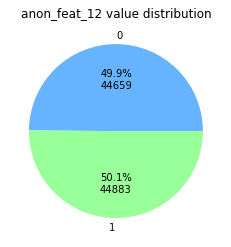

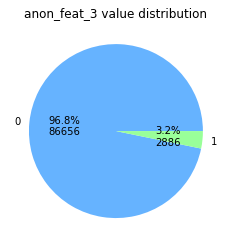

In [11]:
# Function that displays the percentage in the pie chart
def display_percent(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Function that creates a pie chart for a boolean feature
def bool_feat_prop(feat_name):
    bool_values = feature_data[[feat_name]].groupby(feat_name).size()
    plt.pie(bool_values, labels = ['0','1'], colors = ['#66b3ff','#99ff99'], 
            autopct=lambda pct: display_percent(pct, [bool_values[0],bool_values[1]]))
    plt.title(feat_name + ' value distribution')
    plt.show()

print('Graph 3 - Boolean feature distribution\n')

# Call the function for each boolean feature
for name in bool_feat_name:
    bool_feat_prop(name)

In [12]:
# 96.8% of the values of 'anon_feat_3' feature are the same, so this feature is not enough informative.
feat_to_drop.append('anon_feat_3')

# Delete feature from boolean features list 
bool_feat_name = np.delete(bool_feat_name,np.where(bool_feat_name == 'anon_feat_3'))

### Find highly correlated features (for numeric features)

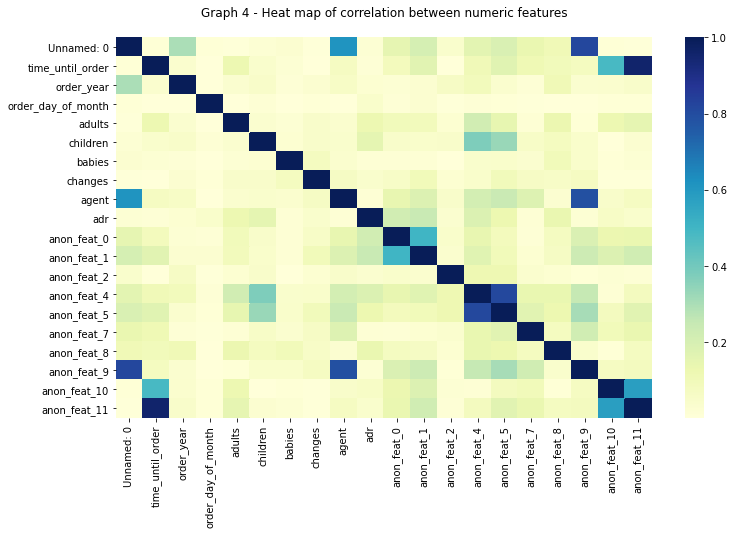

Highly correlated feature:  ['time_until_order', 'anon_feat_11']


In [13]:
# Create correlation matrix
corr_matrix = feature_data[numeric_feat_name].corr().abs()

#heatmap of the correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title('Graph 4 - Heat map of correlation between numeric features\n')
plt.show()

# Find names of the two features with correlation greater than 0.95
corr_features = [column for column in corr_matrix.columns if any((corr_matrix[column] > 0.95) & (corr_matrix[column] < 1))]
print('Highly correlated feature: ',corr_features)

In [14]:
# We found two highly correlated features, so we decided to drop one of them.
# We dropped the feature that has also relatively high correlation with other features.
feat_to_drop.append('anon_feat_11')

# Delete feature from numeric features list 
numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == 'anon_feat_11'))

### Exploring the country feature:
We count how many samples we have from each country

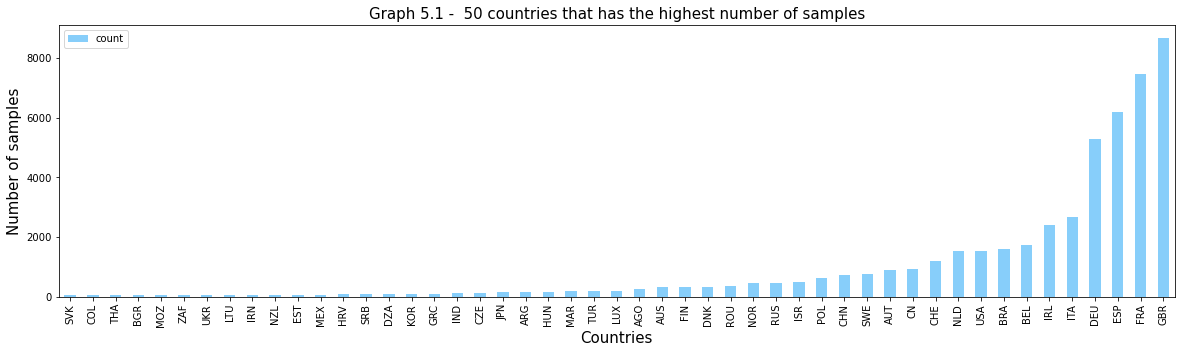

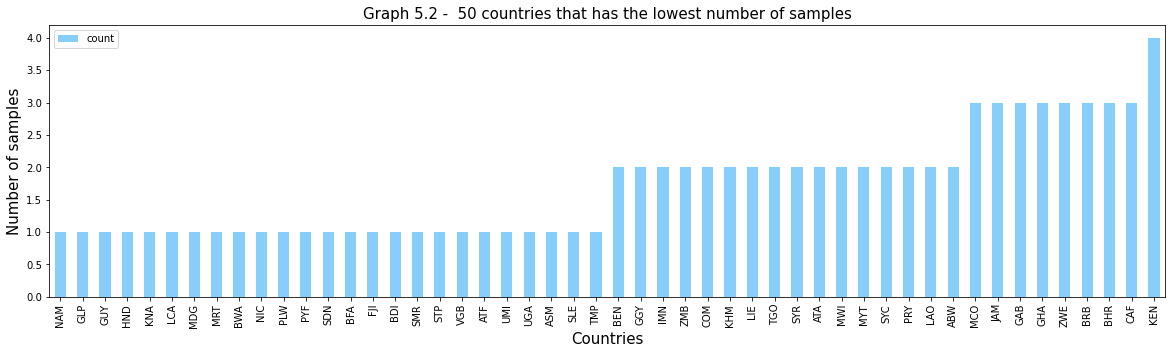

In [15]:
# A data frame with the number of samples from each country
country_sample = feature_data[['country']].groupby(['country']).size()
country_sample = pd.DataFrame(data = country_sample)
country_sample = country_sample.rename(columns = {country_sample.columns[0]: 'count'})

# Sort the values
country_sample = country_sample.sort_values(by = 'count')

# Take the 50 countries that has the highest/lowest number of samples
fifty_countries_tail = country_sample.tail(50)
fifty_countries_head = country_sample.head(50)

# For the fifty highest - We found that the amount of samples for the country PRT is significantly higher than the other countries,
# so we ignored it in the graph
fifty_countries_tail = fifty_countries_tail.iloc[:-1,:]

# Function to plot the data
def plot_country(countries,name,num_graph):
    countries.plot.bar(figsize=(20,5), color='lightskyblue')
    plt.xlabel('Countries', size = 15)
    plt.ylabel('Number of samples', size = 15)
    plt.title(f'Graph 5.{num_graph} -  50 countries that has the ' + name + ' number of samples' , size = 15)
    plt.legend()
    plt.show()

plot_country(fifty_countries_tail,'highest',1)
plot_country(fifty_countries_head,'lowest',2)

We consider samples from countries that appear in less than 1% of the samples as outliers.
We will change their value in the preprocessing.

In [16]:
# Create a list of those countries
one_percent_of_data = 0.01*feature_data.shape[0]
country_to_change = pd.DataFrame(country_sample['count'] <= one_percent_of_data)
country_to_change = list(country_to_change[country_to_change['count'] == True].index)

### Graph 6 - Function to find connection between labels and features' values

Graph 6 - Log distribution of labels for each feature


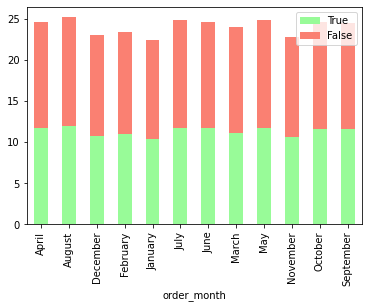

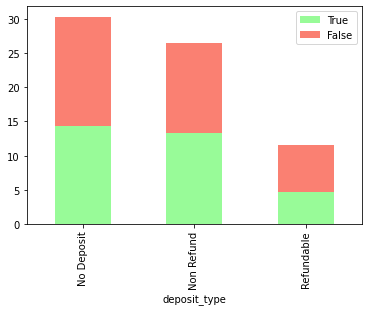

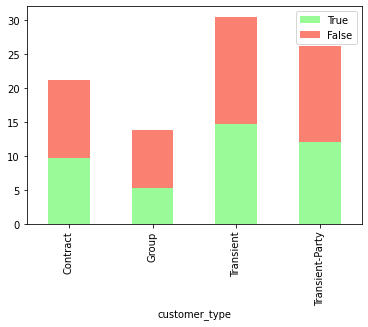

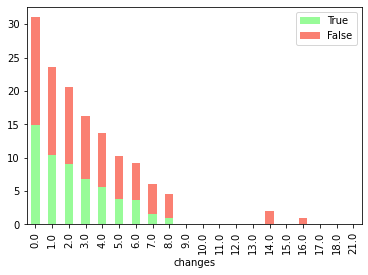

In [17]:
# A function that plots the distribution of labels for a feature
def feature_label_connec(f_col,l_col,feature_name):
    # Create a dataframe with the feature and the labels
    combined_df = pd.concat([f_col,l_col], axis=1)
    size_group = combined_df.groupby(feature_name).size()
    
    # Count the number of label=True and label=False
    num_true = np.log2(combined_df.groupby(feature_name)['cancelation'].sum())
    num_false = np.log2(size_group - num_true)
    info_df = pd.concat([num_true,num_false],axis=1)
    info_df = info_df.rename(columns = {'cancelation':'True', 0:'False'})
    
    # Plot the data
    plot = info_df.plot.bar(stacked=True, color = ['palegreen','salmon'])
    plt.legend(loc = 'upper right')
    return plot


l = label_data[['cancelation']]
lst = ['order_month','deposit_type','customer_type','changes']
print( 'Graph 6 - Log distribution of labels for each feature')
for name in lst:
    f = feature_data[[name]]
    feature_label_connec(f,l,name)

### Graph 7 - Distribution of features (see which features have "tail" - Outliers)

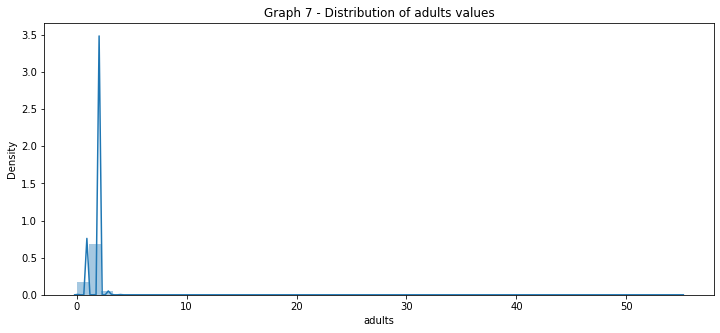

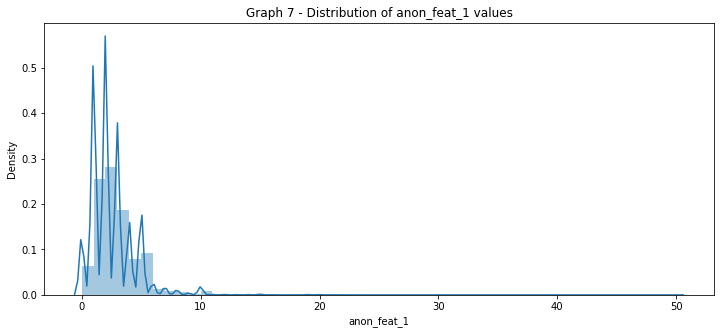

In [18]:
# A function that plots the distribution of feature's values
def feature_distribution(feature_name):
    plt.figure(figsize=(12,5))
    sns.distplot(feature_data[feature_name])
    plt.title('Graph 7 - Distribution of '+feature_name+' values')

outlier_feat = ['adults','anon_feat_1']
for name in outlier_feat:
    feature_distribution(name)

# Preprocessing

### Split the data to train and validation

In [19]:
train,valid,y_train,y_valid = train_test_split(feature_data, label_data, test_size = 0.25,random_state = 42,shuffle = True)

### Combine data and labels

In [20]:
train['Label'] = y_train['cancelation']
valid['Label'] = y_valid['cancelation']

### Drop uniformative features

First, we decided to ignore 'Unnamed: 0' feature because its values are used as IDs and thus will not contribute to our model.

Second, we think that the sizes of the values of the feature 'agent' have no meaning ,i.e. a larger number is not necessarily better.

In addition, we think that the feature 'adr' does not contribute to the prediction of the label of each sample.

In [21]:
# Add the features to the feat_to_drop list
uninfo_feat = ['agent','adr','Unnamed: 0']
for feat in uninfo_feat:
    feat_to_drop.append(feat)
    
# Function to drop uniformative features
def drop_uninformative(data,feat_to_drop):
    data = data.drop(feat_to_drop, axis=1)
    return data


train = drop_uninformative(train,feat_to_drop)
valid = drop_uninformative(valid,feat_to_drop)
test = drop_uninformative(test,feat_to_drop)


# Delete features from numeric features list
for feat in uninfo_feat:
    numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == feat))

### Outliers

#### Outliers of numeric features

1. <u>Drop outliers</u>

According to Graph 7 , it can be seen that most of the values of the features 'adults' and 'anon_feat_1' are in a certain range, which is a reasonable number of standard deviation from the mean*(1)*.
However, there are samples that have values which are very far from this range .This is a relatively small amount of samples, so we decided to remove them.

*(1) We assume that samples that are far more then 3 standard deviation from the mean are outliers.*

*note: We don't run this function on the test data, because it drops samples, and we want to give a prediction to all of the samples.*

In [22]:
# Outliers 
def outliers(feat_name, data):
    #For the feature - calculating the std for each sample
    z_scores = ((data[feat_name] - data[feat_name].mean())/(data[feat_name].std(ddof=0)))
    #Drop the samples that are more than 3 std from the mean value
    return data[z_scores < 3]

for name in outlier_feat:
    train = outliers(name, train)
    valid = outliers(name, valid)

2. <u>Change multiple values to a single value</u>

According to graph 2, we noticed a "tail" in the distribution of the feature 'changes'.
So we decided to change multiple values to a single value according to the same graph, meaning removing the "tail".

In othe words, only 1.3% of the samples have value higher than 3 in the feature 'changes', so we decided to change their value to 3.

In [23]:
# Function that changes the requested values
def remove_tail(feature_name,value,data):
    data[feature_name][data[feature_name] >= value] = value
    return data

tail_features = ['changes']
tail_values = [3]
for i in range(len(tail_features)):
    train = remove_tail(tail_features[i],tail_values[i],train)
    valid = remove_tail(tail_features[i],tail_values[i],valid)
    test = remove_tail(tail_features[i],tail_values[i],test)

#### Outliers of categorial features

1. <u>Change the value of outliers to the most common value</u>

We noticed that there are only 4 samples in the data that have the value 'Undefined' in one or in both of the features: 'order_type' and 'acquisition_channel'. So we decided to change their values to the most common value of the feature.

In [24]:
def change_samples_value(data,feat_name):
    # A data frame with the number of samples from each value of a feature
    count_val = data[[feat_name]].groupby([feat_name]).size()
    count_val = pd.DataFrame(data = count_val)
    count_val = count_val.rename(columns = {count_val.columns[0]: 'count'})
    #Sort the values
    count_val = count_val.sort_values(by = 'count', ascending = False)
    #Fill the cells with the value 'Undefined' to the value that is most common
    data[feat_name][data[feat_name] == 'Undefined'] = count_val.index[0]
    return data

features_value_to_change = ['order_type','acquisition_channel']

for feat in features_value_to_change:
    train = change_samples_value(train,feat)
    valid = change_samples_value(valid,feat)
    test = change_samples_value(test,feat)

2. <u>Change multiple values to a single value</u>

According to graph 5.2, we decided to change multiple values to a single value- changing the value of samples from countries that appear in less than 1% of the samples to 'other'.

In [25]:
# Function to change the value of samples from a specific country
def samples_change(country_to_change,data):
    for country in country_to_change:
        # Change the value of samples from data
        data['country'][data['country'] == country] = 'other'
    data['country'][data['country'].isna()] = 'other'
    return data

train = samples_change(country_to_change,train)
valid = samples_change(country_to_change,valid)
test = samples_change(country_to_change,test)

We noticed that there are samples in the test that their value in the country feature does not appear in the train country feature.
So we decided to change their value to 'other'.

In [26]:
# A data frame with the number of samples from each country in the test data
country_count_samples = test[['country']].groupby(['country']).size()
country_count_samples = pd.DataFrame(data = country_count_samples)
country_count_samples = country_count_samples.rename(columns = {country_count_samples.columns[0]: 'count'})

country_to_other = pd.DataFrame(country_count_samples['count'] <= 3)
country_to_other = list(country_to_other[country_to_other['count'] == True].index)

test = samples_change(country_to_other,test)

### Convert feature type

We decided to change the values of 'anon_feat_12','order_week' and 'order_month' features to numeric values, because when we will create dummy variables we don't want these features to become two features.

1. <u>'order_week' feature</u>

The values' format in this feature is 'week_#', we decided to keep only the number of the week and convert it to int type.

In [27]:
def convert_order_week_type(data):
    data['order_week'] = (data['order_week'].str.strip('week_'))
    data['order_week'] = data['order_week'].astype(np.float)
    return data

train = convert_order_week_type(train)
valid = convert_order_week_type(valid)
test = convert_order_week_type(test)

# Move feature 'order_week' from categorial features list to numeric features list: 
numeric_feat_name = np.append(numeric_feat_name,'order_week')
categorial_feat_name = np.delete(categorial_feat_name,np.where(categorial_feat_name == 'order_week'))

2. <u>'anon_feat_12' feature</u>

In [28]:
train['anon_feat_12'].replace({True:1, False:0}, inplace=True)
valid['anon_feat_12'].replace({True:1, False:0}, inplace=True)
test['anon_feat_12'].replace({True:1, False:0}, inplace=True)

3. <u>'order_month' feature</u>

In [29]:
#For non-empty cells convert month name to month number
train['order_month'].replace({ 'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
                            'July': 7,'August': 8,'September': 9, 'October': 10,'November': 11,'December': 12}
                            , inplace=True)

valid['order_month'].replace({ 'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
                            'July': 7,'August': 8,'September': 9, 'October': 10,'November': 11,'December': 12}
                            , inplace=True)

test['order_month'].replace({ 'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
                            'July': 7,'August': 8,'September': 9, 'October': 10,'November': 11,'December': 12}
                            , inplace=True)

# Move feature 'order_month' from categorial features list to numeric features list
numeric_feat_name = np.append(numeric_feat_name,'order_month')
categorial_feat_name = np.delete(categorial_feat_name,np.where(categorial_feat_name == 'order_month'))

### Fill empty cells

#### For numeric and boolean features

According to graph 1, there are some features with missing values and according to graph 2 we decided how to handle some of them.

We tried two ways - fill empty cells with mean and fill empty cells with majority value.

For some of the features, we noticed that the values are relatively scattered so we decided to fill in the empty values with the mean to maintain this scatter.

For other features, we noticed that they have a value that is more common than the others, so we tried to fill in the empty values with that value. **We didn't choose this way eventually**

The function we wrote (and didn't use eventually):

def fill_empty_majority(feat_name,data):
    # A data frame with the number of samples from each value of a feature
    count_val = data[[feat_name]].groupby([feat_name]).size()
    count_val = pd.DataFrame(data = count_val)
    count_val = count_val.rename(columns = {count_val.columns[0]: 'count'})
    #Sort the values
    count_val = count_val.sort_values(by = 'count', ascending = False)
    #Fill the empty cells with the value that is most common
    data[[feat_name]] = data[[feat_name]].fillna(count_val.index[0])
    return data

<u>Fill empty cells with mean</u>

In [30]:
def fill_empty_mean(feat_name, data):
    mean_feat = data[feat_name].mean()
    data[[feat_name]] = data[[feat_name]].fillna(mean_feat)
    return data

for name in fill_feat_mean:
    train = fill_empty_mean(name, train)
    valid = fill_empty_mean(name, valid)
    test = fill_empty_mean(name, test)

# Eventually, we decided also for this features to fill their empty cells with the mean
for name in fill_feat_major:
    train = fill_empty_mean(name, train)
    valid = fill_empty_mean(name, valid)
    test = fill_empty_mean(name, test)

#### For categorial features

1. <u>Special treatment to retain the distribution of the values - 'order_month' feature<u>

First try - **we didn't choose this way eventually**

According to graph 6 , we noticed that the ratio between the labels for the non-empty cells, for each month, is relatively the same (there is approximately 66% FALSE).
In addition, we calculated the amount of FALSE labels for the empty cells of this feature and noticed it has approximately the same FALSE ratio.
Therefore, we chose to fill in the empty values in 'order_month' with numbers 1-12, so that the division will be relatively even between the FALSE label and the TRUE label for each month. In other words, we wanted to maintain the ratio we noticed in Graph 6.

The function we wrote (and didn't choose eventually):

def treat_order_month(data,num):
    # Treatment for train and validation
    if num == 1: # 1 indicates train/validation
        #Fill empty cells
        #Filter empty cells in labels data and sort by label
        empty_month = data['Label'][data['order_month'].isna()]
        empty_month = pd.DataFrame(data = empty_month)
        empty_month = empty_month.sort_values(by = 'Label')

        #Fill the cells with month number so it will be divided evenly between samples with FALSE label and TRUE label.
        months =[]
        j=1
        for i in range(0,empty_month.shape[0]):
            months.append(j)
            j += 1
            if j == 13 :
                j = 1
        empty_month['month'] = months
        data['order_month'][empty_month.index] = empty_month['month']
        
    # Problem - Treatment for test
    return data

Second try

We used the feature 'order_week' to fill the empty cells of the feature 'order_month'.
For sample with number of week between 1-4 we filled 1; for sample with number of week between 4-8 we filled 2, and so forth.

In [31]:
# Function to change all the values between a and b to the value of num
def treat_order_month(data,a,b,num):    
    data['order_month'][(data['order_week']>a) & (data['order_week']<=b)] = num
    return data

# Initialize the limits of the first month- between 0 and 4 weeks
a = 0
b = 4
for i in range(1,15):
    if i >= 13:
        train = treat_order_month(train,a,b,1)
        valid = treat_order_month(valid,a,b,1)
        test = treat_order_month(test,a,b,1)
    else:
        train = treat_order_month(train,a,b,i)
        valid = treat_order_month(valid,a,b,i)
        test = treat_order_month(test,a,b,i)
    a += 4
    b += 4

2. <u>Create new value</u>

For the features 'deposit_type' and 'costumer_type', according to graph 6 we concluded that the features behave in a special way. Therefore, we decided to create a new value for the empty cells.

In [32]:
def new_value(data):
    # Fill the empty cells with new type
    data[['deposit_type']] = data[['deposit_type']].fillna('other')
    data[['customer_type']] = data[['customer_type']].fillna('other')
    return data

train = new_value(train)
valid = new_value(valid)
test = new_value(test)

### Creating new features

1. <u>Combining three features</u>

We decided to combine the features: adults, children and babies to one feature.

In [33]:
def combine_features(data):
    data['travelers'] = data['children'] + data['babies'] + data['adults']
    data = data.drop(['adults','children','babies'], axis=1)
    return data

train = combine_features(train)
valid = combine_features(valid)
test = combine_features(test)

# Drop the samples that have 0 travelers from the train data.
train = train[train['travelers'] != 0]

# Update the numeric features list
numeric_feat_name = np.append(numeric_feat_name, 'travelers')
numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == 'adults'))
numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == 'children'))
numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == 'babies'))

2. <u>Changing the values of a feature<u>

Changing the values of 'time_until_order' feature from days to months

In [34]:
# Function to change all the values between small and big to the value of month
def time_to_months(data,small,big,month):
    data['time_until_order'][(data['time_until_order'] >= small) & (data['time_until_order'] < big)] = month
    return data

def treat_time_until_order(data):
    # Initialize the limits of the first month- between 0 and 30 days
    start_month = 0
    end_month = 30
    # Find the number of months according to the values in the feature 'time_until_order'
    max_month = np.ceil(max(data['time_until_order'])/30).astype(int)
    # Run the function time_to_months
    for month in range(1 , max_month + 1):
        data = time_to_months(data , start_month , end_month , month)
        start_month+=30
        end_month+=30
    return data

train = treat_time_until_order(train)
valid = treat_time_until_order(valid)
test = treat_time_until_order(test)

Changing the values of categorial features:'order_type' , 'acquisition_channel' , 'deposit_type' , 'customer_type'.

Change their values to numeric values.

In [35]:
# Function that changes the categorial features' values from string to float
def change_categorial_values(data,array):
    oe = OrdinalEncoder(dtype=np.int64)
    data[array] = oe.fit_transform(data[array])
    return data

categorial_feat = ['acquisition_channel','deposit_type','customer_type']

train = change_categorial_values(train,categorial_feat)
valid = change_categorial_values(valid,categorial_feat)
test = change_categorial_values(test,categorial_feat)

# Update numeric and categorial features lists
for feat in categorial_feat:
    numeric_feat_name = np.append(numeric_feat_name,feat)
    categorial_feat_name = np.delete(categorial_feat_name,np.where(categorial_feat_name == feat))

### Split data into data and labels

In [36]:
X_train = train.loc[:, train.columns != 'Label']
y_train = pd.DataFrame(data = train['Label'])

X_valid = valid.loc[:, valid.columns != 'Label']
y_valid = pd.DataFrame(data = valid['Label'])

### The features we have so far, sorted by type

In [37]:
print('Types so far:\n')
print('Boolean Features: ',bool_feat_name, '\n')
print('Categorial Features: ',categorial_feat_name, '\n')
print('Numeric Features: ',numeric_feat_name, '\n')

Types so far:

Boolean Features:  ['anon_feat_12'] 

Categorial Features:  ['country' 'order_type'] 

Numeric Features:  ['time_until_order' 'order_year' 'order_day_of_month' 'changes'
 'anon_feat_0' 'anon_feat_1' 'anon_feat_2' 'anon_feat_4' 'anon_feat_5'
 'anon_feat_7' 'anon_feat_8' 'anon_feat_9' 'anon_feat_10' 'order_week'
 'order_month' 'travelers' 'acquisition_channel' 'deposit_type'
 'customer_type'] 



### Create dummy variables

In [38]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
test = pd.get_dummies(test)

### Boxplot for numeric features - check outliers before scaling

MinMax scaler is sensitive to outliers, so we wanted to make sure that we managed to reduce the number of outliers in the data and also to get rid of the very extreme values that can harm the MinMax scaling.

*note: We didn't show 'order_year' feature in the boxplot because it has high values and only three values.*

Text(0.5, 1.0, 'Check Outliers After Treatment')

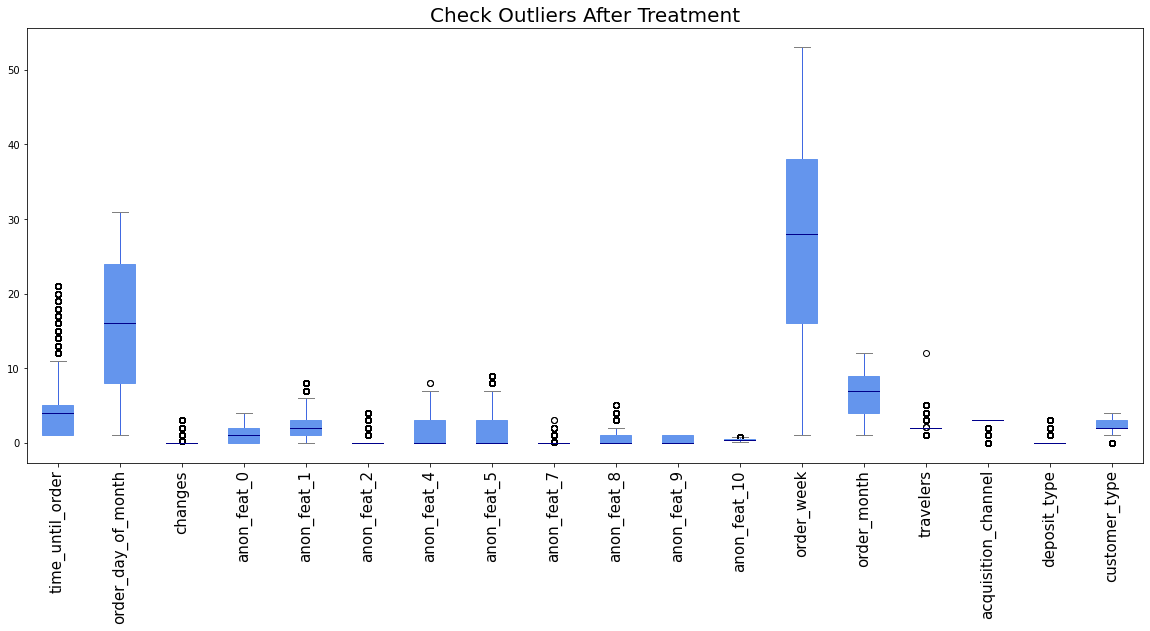

In [39]:
numeric_feat_name = np.delete(numeric_feat_name,np.where(numeric_feat_name == 'order_year'))

numeric_df= pd.DataFrame(X_train[numeric_feat_name])
props = dict(boxes="cornflowerblue", whiskers="royalblue", medians="DarkBlue", caps="Gray")
plt_box = numeric_df.plot.box(color=props, patch_artist=True,figsize=(20,8))
plt.xticks(rotation = 'vertical',size = 15)
plt_box.set_title('Check Outliers After Treatment',size = 20)

### Scaling the data

We chose to scale the data because at this point, the range of the values of each feature is very different from the other features' ranges.
Without scaling, features will not contribute to the model equally and some models will work faster with scaling.

First try - Normalization - **we didn't choose it eventually**

First, we tried to scale the data with Z-score normalization. 

After normalization, we get features with smaller range of values with mean=0 and variance=1.

The function we wrote:

def normalize_data(data):
>coulmns_name = data.columns <br>
    standard_scaler = StandardScaler() <br>
    standard_scaler.fit(data) <br>
    data = pd.DataFrame(standard_scaler.transform(data), index=data.index, columns=coulmns_name) <br>
    return data

Second try - MinMax scaling

After MinMax scaling, we get a fixed range of values in the data.

In [40]:
def MinMax_Scaling(data):
    coulmns_name = data.columns
    Min_Max_scaler = MinMaxScaler()
    Min_Max_scaler.fit(data)
    data = pd.DataFrame(Min_Max_scaler.transform(data), index=data.index, columns=coulmns_name)
    return data

X_train = MinMax_Scaling(X_train)
X_valid = MinMax_Scaling(X_valid)
test = MinMax_Scaling(test)

### Feature selection - Dimensionality  reduction

The more features we have, the larger the dimensionality of the problem. We can recognize high dimensionality when the data is too scattered. Then, we can get more noise into the model. As a result, we get a high variance in the model, which could negatively affect the bias-variance trade-off.

In [41]:
print('The number of features of train data we have so far: ', X_train.shape[1])
print('The number of features of test data we have so far: ', test.shape[1])

The number of features of train data we have so far:  42
The number of features of test data we have so far:  42


First try - **we didn't choose it eventually**

We tried to use PCA to reduce the number of features. 

The function we wrote (and didn't use eventually):
    
    pca = PCA(n_components =20)
    pca.fit(X_train)
    X_train = pd.DataFrame(pca.transform(X_train))

    pca2 = PCA(n_components =20)
    pca2.fit(X_valid)
    X_valid = pd.DataFrame(pca2.transform(X_valid))

Second try

We use chi2 test to find the best features for the model

In [42]:
# Create and fit selector
selector = SelectKBest(score_func=chi2, k=36)
selector.fit(X_train, y_train)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_train = pd.DataFrame(data = selector.transform(X_train), columns = cols)
X_valid = X_valid.iloc[:,cols]
X_train.columns = X_valid.columns
test = test.iloc[:,cols]

In [43]:
print('The number of features we have after feature selection: ', X_train.shape[1])

The number of features we have after feature selection:  36


# Models

### <u> Simple models </u>

### KNN Model

We found the hyperparameters with GridSearch:

>param_grid = { <br>
        'n_neighbors': [110,120,150,180,190,200,210], <br>
        'weights': ['uniform','distance'], <br>
        'p': [1,2], <br>
        'metric': ['manhattan','minkowski']
        } <br>
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), scoring='roc_auc', param_grid=param_grid) <br>
grid_search.fit(X_train,y_train) <br>
print(grid_search.best_params_) <br>

the results we got:<br>
{'metric': 'manhattan', 'n_neighbors': 120, 'p': 1, 'weights': 'distance'}

In [44]:
clf_KNN = KNeighborsClassifier(n_neighbors=120, weights='distance',algorithm='auto',
                               leaf_size=30, p=1, metric='manhattan', metric_params=None)

### Logistic Regression

We found the hyperparameters with GridSearch:
>param_grid_log = { <br>
    'penalty': ['elasticnet'], <br>
    'tol': [0.1,0.001,1e-02], <br>
    'C' : [0.001, 0.01, 0.0001], <br>
    'class_weight' :['balanced',{True : 0.37,False : 0.63},{True : 0.25,False : 0.75}], <br>
    'solver' :['saga'], <br>
    'l1_ratio' : [1,0.5,0.8], <br>
    'max_iter' :[76,82,97] <br>
    } <br>
grid_logistic = GridSearchCV(estimator =LogisticRegression(random_state = 6), param_grid=param_grid_log, n_jobs=-1, scoring='roc_auc') <br>
grid_logistic.fit(X_train, y_train) <br>
print(grid_logistic.best_params_) <br>


the results we got:<br>
{'penalty': 'elasticnet', 'tol': 0.1, 'C': 0.01, 'class_weight': 'balanced', 'solver': 'saga', 'max_iter': 76, 'l1_ratio': 0.8}

In [45]:
clf_LR = LogisticRegression(penalty='elasticnet', dual=False, tol= 0.1, C=0.01,
                            fit_intercept=True,intercept_scaling=1, class_weight='balanced',
                            random_state=None,solver='saga', max_iter=76, multi_class='auto',
                            verbose=0,warm_start=False, n_jobs=None, l1_ratio=0.8)

### <u> Advanced Models </u>

### MLP Model

We found the hyperparameters with GridSearch:
>parametersOptions = {'activation' : ["logistic", "relu"], <br>
                      'hidden_layer_sizes' : [(100,), (50, 50), (100,100),(100,100,100)], <br>
                      'batch_size' : [10, 50], <br>
                      'solver': ['sgd', 'adam'], <br>
                      'alpha': [0.0001, 0.05], <br>
                      'learning_rate_init' : [0.1, 0.01], <br>
                      'learning_rate': ['constant','adaptive'], <br>
                      'max_iter' : [1500]} <br>                  
GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc') <br>
GS.fit(X_train, y_train) <br>
print(GS.best_params_) <br>

The results we got: <br>
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'solver': 'sgd'}

In [46]:
clf_MLP = MLPClassifier(hidden_layer_sizes=(100, 100),
                        activation = "relu", solver='sgd', alpha=0.05,
                        batch_size=50, learning_rate='adaptive', learning_rate_init=0.1,
                        power_t=0.5, max_iter=200, shuffle=True,
                        random_state=None, tol=0.0001, verbose=False,
                        warm_start=False, momentum=0.9, nesterovs_momentum=True,
                        early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                        beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

### RandomForest Model

We found the hyperparameters with GridSearch:
>param_grid = { <br>
    'max_depth': [2,4,15,20], <br>
    'max_features': [2,6,9,14], <br>
    'min_samples_leaf': [2,5,10], <br>
    'min_samples_split': [2,7,10,15], <br>
    'n_estimators': [130,160,200], <br>
    'criterion': ['gini','entropy']} <br>
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=6), scoring='roc_auc', cv=3, param_grid=param_grid) <br>
grid_search.fit(X_train,y_train) <br>
print(grid_search.best_params_) <br>

The results we got: <br>
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [47]:
clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=20,
                                min_samples_split=2, min_samples_leaf=2,
                                min_weight_fraction_leaf=0.0, max_features=14, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,min_impurity_split=None, bootstrap=True,
                                oob_score=False, n_jobs=-1,random_state=6, verbose=0,
                                warm_start=False, class_weight=None)

# Model Evaluation

## K-Fold Cross Validation

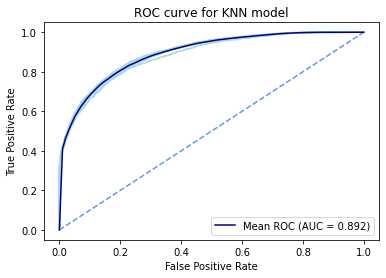

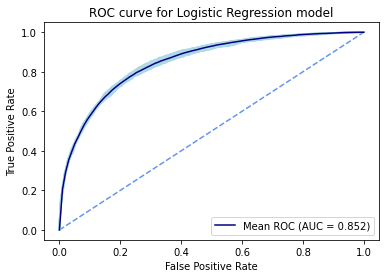

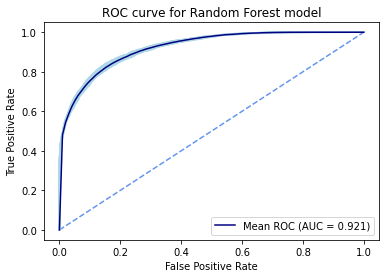

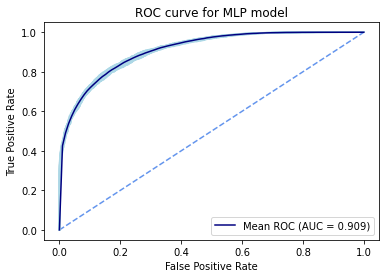

In [48]:
def KfoldPlot(X, y, clf, k, model_name):
    # Convert dataframe to numpy array
    X = X.to_numpy()
    y = y.to_numpy()
    
    # For calculating the mean roc_curve:
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    # Plot the random guess line:
    plt.plot([0,1],[0,1],linestyle='--', color='cornflowerblue')
    # Creating K-Fold Cross Validation:
    kf = KFold(n_splits=k, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train2, X_valid2 = X[train_index], X[test_index]
        y_train2, y_valid2 = y[train_index], y[test_index]
        clf.fit(X_train2, y_train2)
        y_prob = clf.predict_proba(X_valid2)
        y_prob = y_prob[:,1]
        #plot the ROC curve:
        fpr, tpr, thresholds = roc_curve(y_valid2, y_prob)
        plt.plot(fpr,tpr,color='lightblue')
        #for calculating the mean roc_curve:
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='navy', label='Mean ROC (AUC = %0.3f)' % mean_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for {} model'.format(model_name))
    plt.legend()
    plt.show()
    return 
    
# Combine train data and validation data
combined_data = pd.concat([X_train.copy(),X_valid.copy()])
combined_labels = pd.concat([y_train.copy(),y_valid.copy()])

# Run K-Fold Cross Validation and plot the ROC_curves
KfoldPlot(combined_data, combined_labels, clf_KNN, 10, "KNN")
KfoldPlot(combined_data, combined_labels, clf_LR, 10, "Logistic Regression")
KfoldPlot(combined_data, combined_labels, clf_RF, 10, "Random Forest")
KfoldPlot(combined_data, combined_labels, clf_MLP, 10, "MLP")

Fit Random Forest classifier on the train data, to evaluate our model on the validation data

In [49]:
clf_RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=14,
                       min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                       random_state=6)

## Confusion Matrix

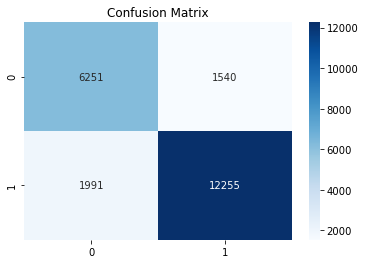

In [50]:
def Confusion_matrix(labels,preds):
    #Create the confusion matrix:
    cm = confusion_matrix(labels,preds)
    tn,fp,fn,tp = cm.ravel()
    cm = np.array([[tp,fp],[fn,tn]])

    # Plot the confusion matrix:
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.show()
    
    
# Get preds from Random Forest Classifier
preds = clf_RF.predict(X_valid)

Confusion_matrix(y_valid,preds)

For Random Forest model with binary labels:

* TP is the number of samples whose label is TRUE and which have reached a leaf that is classified as TRUE.

* TN is the number of samples whose label is FALSE and which have reached a leaf classified as FALSE.

* FP is the number of examples whose label is FALSE but they have reached a leaf that is classified as TRUE.

* FN is the number of examples whose label is TRUE but they have reached a leaf classified as FALSE.

## Performance differences between train and validation

We try to avoid overfitting on the train data, so that the model will  generalize better on new samples. We want the AUC of the train to be close to the AUC of the validation, and that is indeed what we got. Meaning, the model practiced on specific data, and when the model got new samples, it predicted well.

In order to increase the inclusion capability of our model, we tried to reduce the amount of features in a logical way and keep features that are highly correlated to the labels.

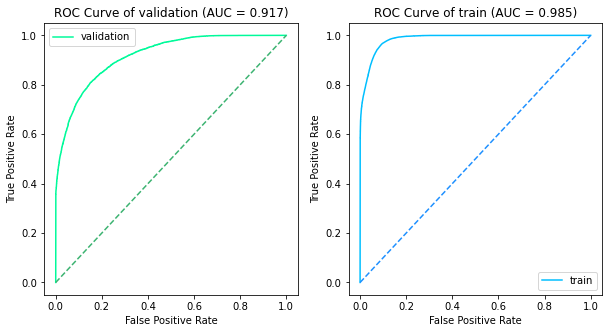

In [51]:
def plot_roc_curve(fpr_train,tpr_train,fpr_valid,tpr_valid):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(fpr_valid,tpr_valid,color='mediumspringgreen', label='validation')
    plt.plot([0,1],[0,1], color= 'mediumseagreen', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of validation (AUC = %0.3f)' % auc(fpr_valid,tpr_valid))
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(fpr_train,tpr_train,color = 'deepskyblue', label = 'train')
    plt.plot([0,1],[0,1], color= 'dodgerblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of train (AUC = %0.3f)' % auc(fpr_train,tpr_train))
    plt.legend()
    
    plt.show()


# Plot confusion matrix of Random Forest model
fpr_train, tpr_train, thresholds = roc_curve(y_train, clf_RF.predict_proba(X_train)[:,1])
fpr_RM, tpr_RM, thresholds = roc_curve(y_valid, clf_RF.predict_proba(X_valid)[:,1])
plot_roc_curve(fpr_train,tpr_train, fpr_RM,tpr_RM)

## Predictions

In [52]:
predictions = pd.DataFrame(data = clf_RF.predict_proba(test)[:,1])
predictions = predictions.rename(columns = {0:'cancel_proba'})
predictions.to_csv("Submission_group_15.csv",index = False)